In [22]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
import pandas as pd

## Step 1: Load Data

In [23]:
df = pd.read_table('wine.data',sep = ",",header = None, names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD','Proline'])
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Step 2: Select s=1/2 for normal distributions
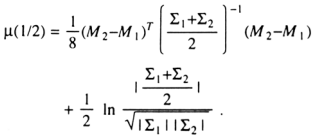

In [24]:
data = df.groupby("Class")

# calculate mean
mean1 = data.get_group(1).iloc[:,1:].mean()
mean2 = data.get_group(2).iloc[:,1:].mean()
mean3 = data.get_group(3).iloc[:,1:].mean()

# calculate the covariance matrix
cov1 = data.get_group(1).iloc[:,1:].cov()
cov2 = data.get_group(2).iloc[:,1:].cov()
cov3 = data.get_group(3).iloc[:,1:].cov()

# calculate the inverse of 1/2 two covariance matrices
# cov1 and cov2
inv_12 = inv((cov1 + cov2) / 2)
# cov1 and cov3
inv_13 = inv((cov1 + cov3) / 2)
# cov2 and cov3
inv_23 = inv((cov2 + cov3) / 2)

# calculate the determinant of covariance matrix
det1 = det(cov1)
det2 = det(cov2)
det3 = det(cov3)

# calculate the determinant of 1/2 two covariance matrices
# cov1 and cov2
det_12 = det((cov1 + cov2) / 2)
# cov1 and cov3
det_13 = det((cov1 + cov3) / 2)
# cov2 and cov3
det_23 = det((cov2 + cov3) / 2)


# calculate normal distributions 
# class 1 and class 2
nd_12 = np.transpose(mean2 - mean1).dot(inv_12).dot(mean2 - mean1)/8 + np.log(det_12 / np.sqrt(det1 * det2))/2
# class 1 and class 3
nd_13 = np.transpose(mean3 - mean1).dot(inv_13).dot(mean3 - mean1)/8 + np.log(det_13 / np.sqrt(det1 * det3))/2
# class 2 and class 3
nd_23 = np.transpose(mean3 - mean2).dot(inv_23).dot(mean3 - mean2)/8 + np.log(det_12 / np.sqrt(det1 * det2))/2

## Step 3: Calculate the upper bound
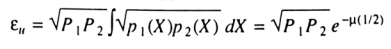

In [39]:
# calculate the probability
prob1 = data.size().iloc[0] / 178
prob2 = data.size().iloc[1] / 178
prob3 = data.size().iloc[2] / 178

# calculate the upper bound of class 1 and class 2
bound_12 = np.sqrt(prob1 * prob2) * np.exp(-nd_12)

# calculate the upper bound of class 1 and class 3
bound_13 = np.sqrt(prob1 * prob3) * np.exp(-nd_13)

# calculate the upper bound of class 2 and class 3
bound_23 = np.sqrt(prob2 * prob3) * np.exp(-nd_23)
print("The upper bound of class 1 and class 2: ", bound_12)
print("The upper bound of class 1 and class 3: ", bound_13)
print("The upper bound of class 2 and class 3: ", bound_23)

The upper bound of class 1 and class 2:  0.005009754739649732
The upper bound of class 1 and class 3:  1.6131966812848823e-08
The upper bound of class 2 and class 3:  0.0026070241978549515
